In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad
import numpy as np

In [51]:
df = pd.read_csv('dados_avc.csv')
df.head(2)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [52]:
# Preencher valores ausentes em 'bmi' com a média
df['bmi'].replace('N/A', float('nan'), inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Converter colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
df.head(2)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0


In [53]:
X = df.drop(['stroke', 'id','age', 'bmi', 'avg_glucose_level'], axis=1)
Y = df['stroke']


In [54]:
X.head(1)

,hypertension,heart_disease,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,1,0,1,0,1,0,0,1,1,0,0


In [55]:
## converting the 0 to -1
X = X.replace(0, -1)

## convering the True to 1 and False to -1
Y = Y.replace(0, -1)
X = X.replace(True, 1)
X = X.replace(False, -1)

X = X.astype('float64')
Y = Y.astype('float64')

In [56]:
## Since the data is assimetrical, it will be used a subset for training
## with all the positive examples and the same nunmber os occurrences of negative examples

X_train = X.iloc[:500]
Y_train = Y.iloc[:500]
X_test = X.iloc[500:]
Y_test = Y.iloc[500:]

In [57]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [58]:
def loss( parametros ):
    w, b, x, y = parametros
    est = w.T @ x + b
    mse = np_.mean( (est - y)**2)
    return mse

g = grad(loss)
x = np.array(X_train).T
y = np.array(Y_train)


In [59]:
w = np.random.randn(x.shape[0], 1)
b = 0.0
alpha = 10**-2

for n in range(15000):
    grad_ = g( (w, b, x, y) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]


In [69]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [70]:
Y_pred = model.predict(X_test)
Y_pred[Y_pred > 0] = 1
Y_pred[Y_pred <= 0] = -1

In [71]:
unique, counts = np.unique(Y_pred, return_counts=True)
print(dict(zip(unique, counts)))

{-1.0: 3087, 1.0: 1523}


In [72]:
def round_to_1_or_minus_1(x):
    if x > 0:
        return 1
    else:
        return -1

In [73]:
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

In [74]:
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

## create tuples with value of w and X column name
w_tuples = []
w_lin_model = []
for i in range(len(w)):
    w_tuples.append((w[i][0], X.columns[i]))
    w_lin_model.append((model.coef_[i], X.columns[i]))

## sort the tuples
w_tuples.sort(reverse=True)
w_lin_model.sort(reverse=True)


In [75]:
print(w_tuples)

x = np.array(X_test).T
y = np.array(Y_test)

y_est = w.T @ x + b
print(f"Acurácia do modelo: {accuracy(y, y_est) * 100:.2f}%")

print(w_lin_model)

print(accuracy_score(Y_test, Y_pred))

[(0.2585316830554321, 'heart_disease'), (0.20865947964299586, 'hypertension'), (0.20105697318614196, 'ever_married_Yes'), (0.09484180391357194, 'smoking_status_formerly smoked'), (0.07863884387784052, 'Residence_type_Urban'), (0.044452630399860894, 'work_type_Self-employed'), (0.030912665124975383, 'gender_Male'), (-0.006689256562750184, 'smoking_status_never smoked'), (-0.011902768686054475, 'work_type_Private'), (-0.03467825025887826, 'smoking_status_smokes'), (-0.05625437203914618, 'work_type_Never_worked'), (-0.19921073408968099, 'work_type_children'), (-0.24646619129026506, 'gender_Other')]
Acurácia do modelo: 67.61%
[(0.2570835574884342, 'heart_disease'), (0.20825354269303856, 'hypertension'), (0.1984683253869115, 'ever_married_Yes'), (0.09119734525130538, 'smoking_status_formerly smoked'), (0.07726388779894605, 'Residence_type_Urban'), (0.03963326374372145, 'work_type_Self-employed'), (0.0318836068568296, 'gender_Male'), (1.3877787807814457e-16, 'gender_Other'), (-0.010146598077

In [76]:
def avaliar_hipotese_nula(y_test):
    return max(np.count_nonzero(y_test == 1), np.count_nonzero(y_test == -1)) / len(y_test)

In [77]:
print(avaliar_hipotese_nula(y))

1.0


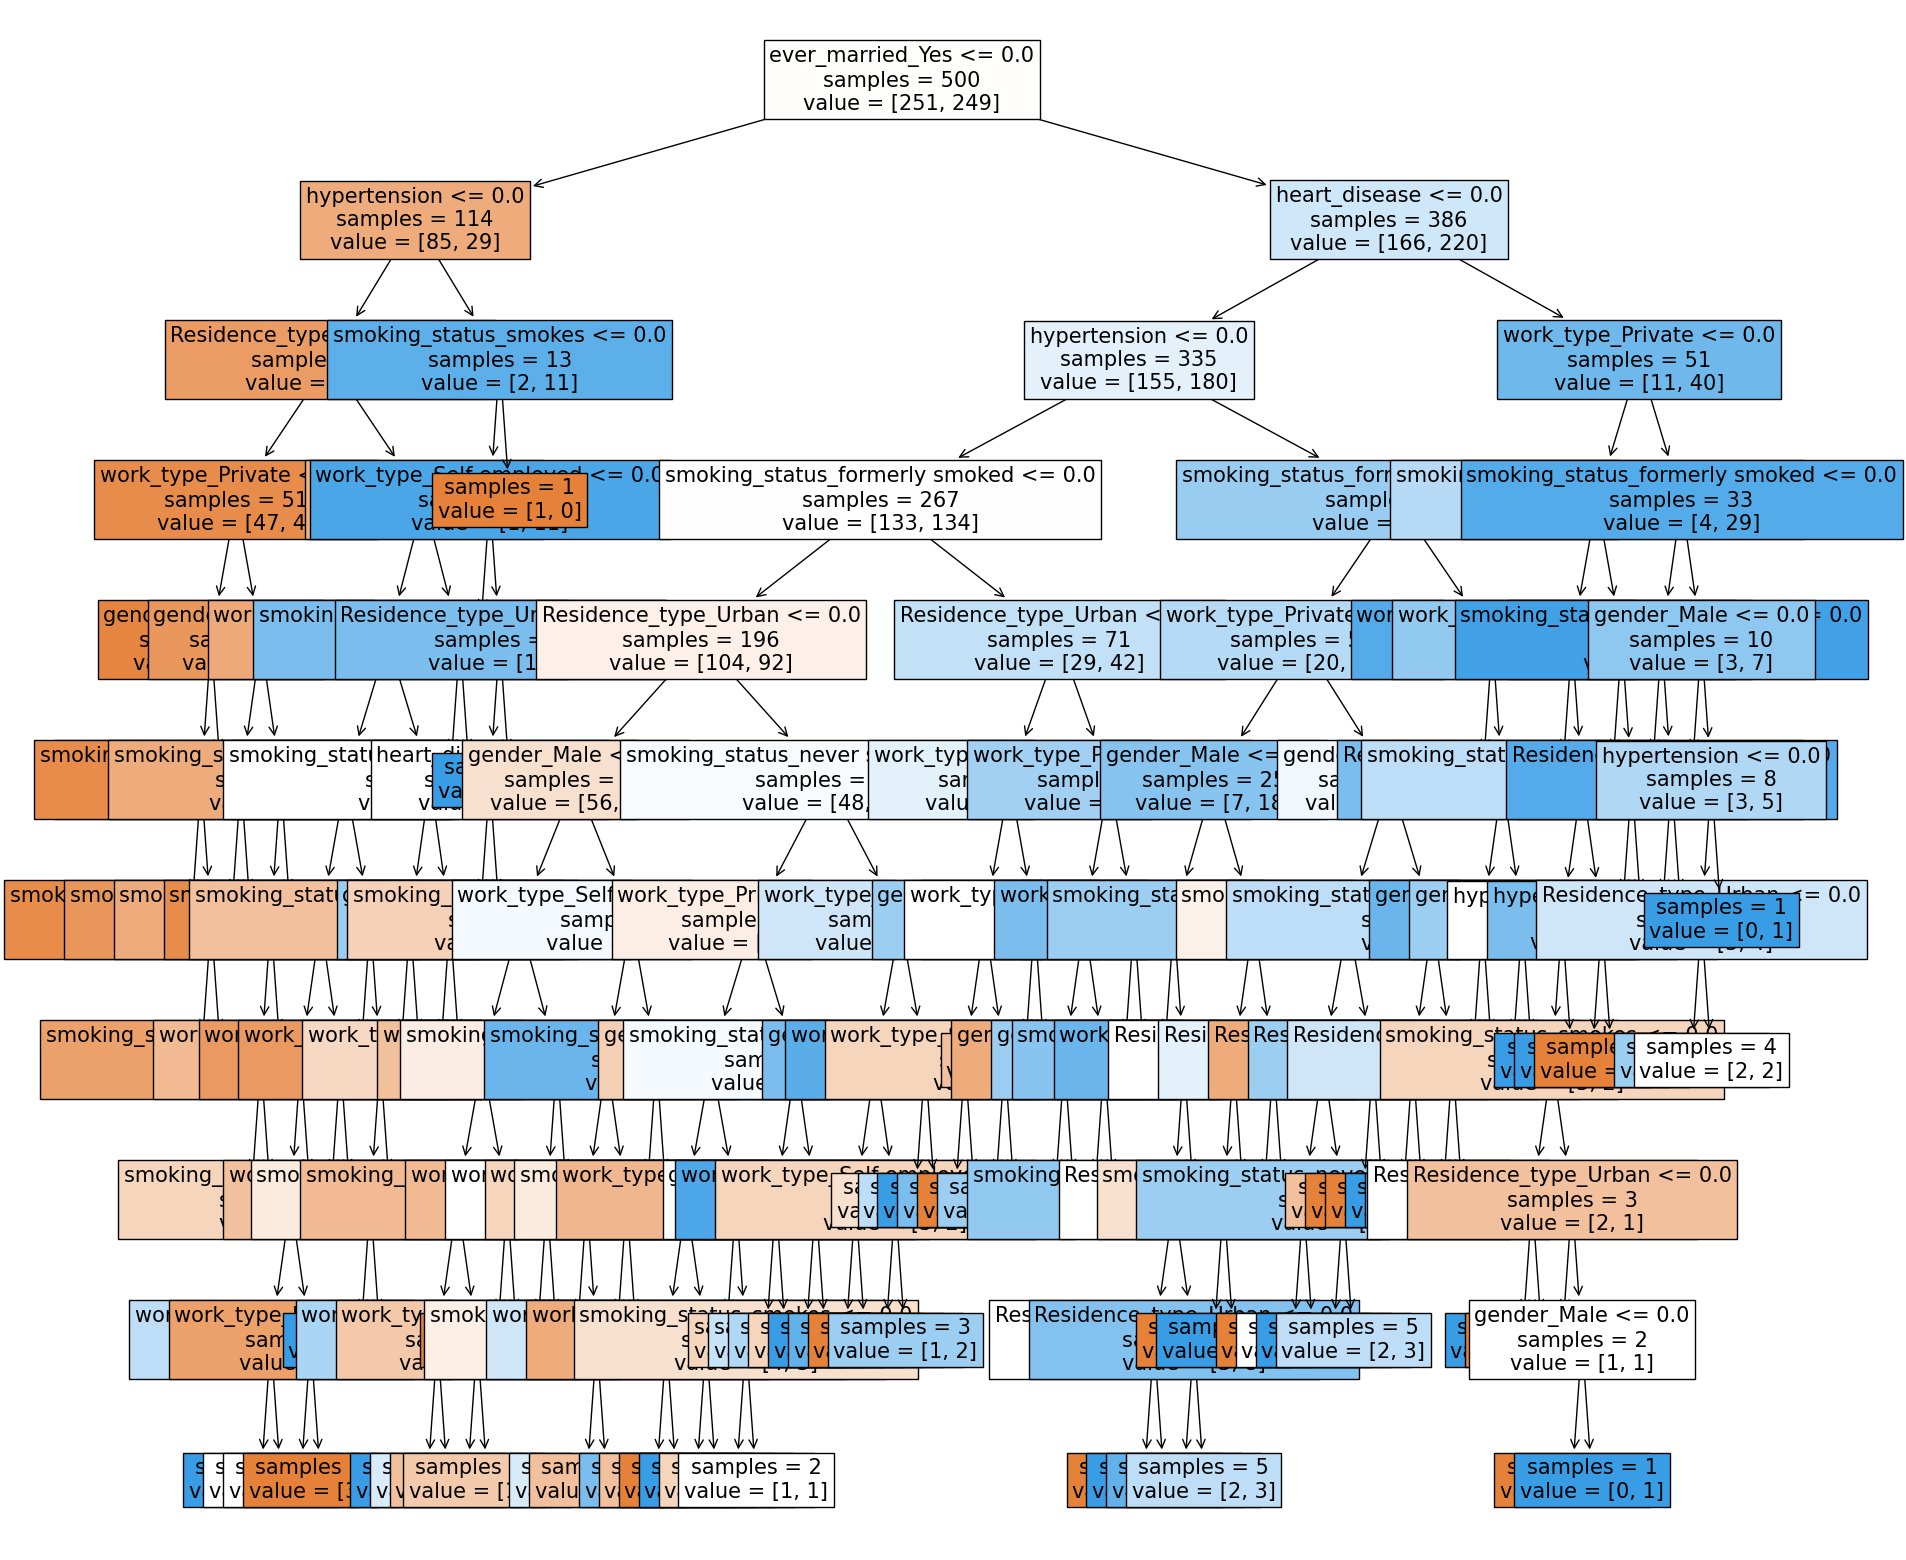

In [78]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy')

# Agora, vamos usar o método .fit() para ajustar os parâmetros da árvore:
tree.fit(X_train, Y_train)

# Podemos visualizar a árvore de decisão em uma figura!
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=X.columns, fontsize=15, 
              node_ids=False, impurity=False, filled=True)

In [79]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Acurácia do modelo de árvore de decisão:", accuracy)


Acurácia do modelo de árvore de decisão: 0.6600867678958785


In [80]:
import pandas as pd

# Obter importância das características
feature_importances = tree.feature_importances_

# Criar DataFrame com as features e sua importância
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar o DataFrame pela importância em ordem decrescente
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Exibir o DataFrame
print(feature_importance_df)


                           Feature  Importance
0                     hypertension    0.146968
4                 ever_married_Yes    0.129568
2                      gender_Male    0.124613
7          work_type_Self-employed    0.115698
9             Residence_type_Urban    0.109108
6                work_type_Private    0.105593
11     smoking_status_never smoked    0.084384
1                    heart_disease    0.066977
12           smoking_status_smokes    0.049657
10  smoking_status_formerly smoked    0.048228
8               work_type_children    0.019207
3                     gender_Other    0.000000
5           work_type_Never_worked    0.000000
